In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

#extracting data from csv file using pandas library
df=pd.read_csv("Amazon Sale Report.csv",encoding='latin1')
#display the first 5 rows of dataset
print(df.head())
#display information about the dataset
print(df.info())



   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [ ]:

#display column names
print(df.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [ ]:
#data cleaning
#converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y',errors='coerce')
print(df['Date'])
#drop duplicates
df.drop_duplicates(inplace=True)
print(df)


0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
128975   2022-05-31
Name: Date, Length: 128976, dtype: datetime64[ns]
         index             Order ID       Date                        Status  \
0            0  405-8078784-5731545 2022-04-30                     Cancelled   
1            1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146 2022-04-30                       Shipped   
3            3  403-9615377-8133951 2022-04-30                     Cancelled   
4            4  407-1069790-7240320 2022-04-30                       Shipped   
...        ...                  ...        ...                           ...   
128971  128970  406-6001380-7673107 2022-05-31                       Shipped   
128972  128971  402-9551604-7544318 2022-05-31                       Shipped   
128973  12

In [ ]:
# Drop unnecessary columns like 'index', 'New', and 'PendingS'
df.drop(columns=['index', 'New', 'PendingS'], inplace=True)
#Drop null values
df.dropna(subset=['Amount', 'ship-city', 'ship-state', 'Category'], inplace=True)
print(df)


                   Order ID       Date                        Status  \
0       405-8078784-5731545 2022-04-30                     Cancelled   
1       171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2       404-0687676-7273146 2022-04-30                       Shipped   
3       403-9615377-8133951 2022-04-30                     Cancelled   
4       407-1069790-7240320 2022-04-30                       Shipped   
...                     ...        ...                           ...   
128971  406-6001380-7673107 2022-05-31                       Shipped   
128972  402-9551604-7544318 2022-05-31                       Shipped   
128973  407-9547469-3152358 2022-05-31                       Shipped   
128974  402-6184140-0545956 2022-05-31                       Shipped   
128975  408-7436540-8728312 2022-05-31                       Shipped   

       Fulfilment Sales Channel ship-service-level  Category Size  \
0        Merchant     Amazon.in           Standard   T-shirt    S 

In [ ]:
df.rename(columns={
    'ship-city': 'City',
    'ship-state': 'State',
    'ship-country': 'Country',
    'Qty': 'Quantity',
}, inplace=True)


In [ ]:
df.head()


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,City,State,ship-postal-code,Country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

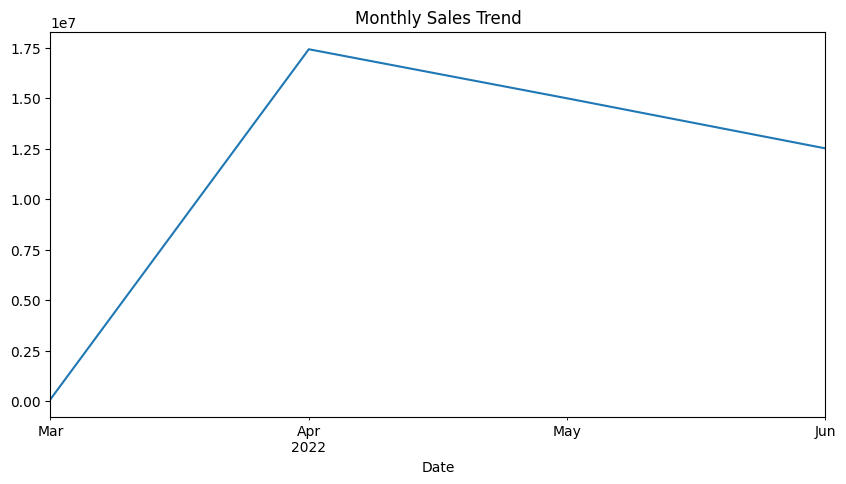

In [ ]:
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Amount'].sum()
monthly_sales.plot(kind='line', title="Monthly Sales Trend", figsize=(10,5))


<ipython-input-1-407335573>:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv', encoding='ISO-8859-1')
<ipython-input-1-407335573>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


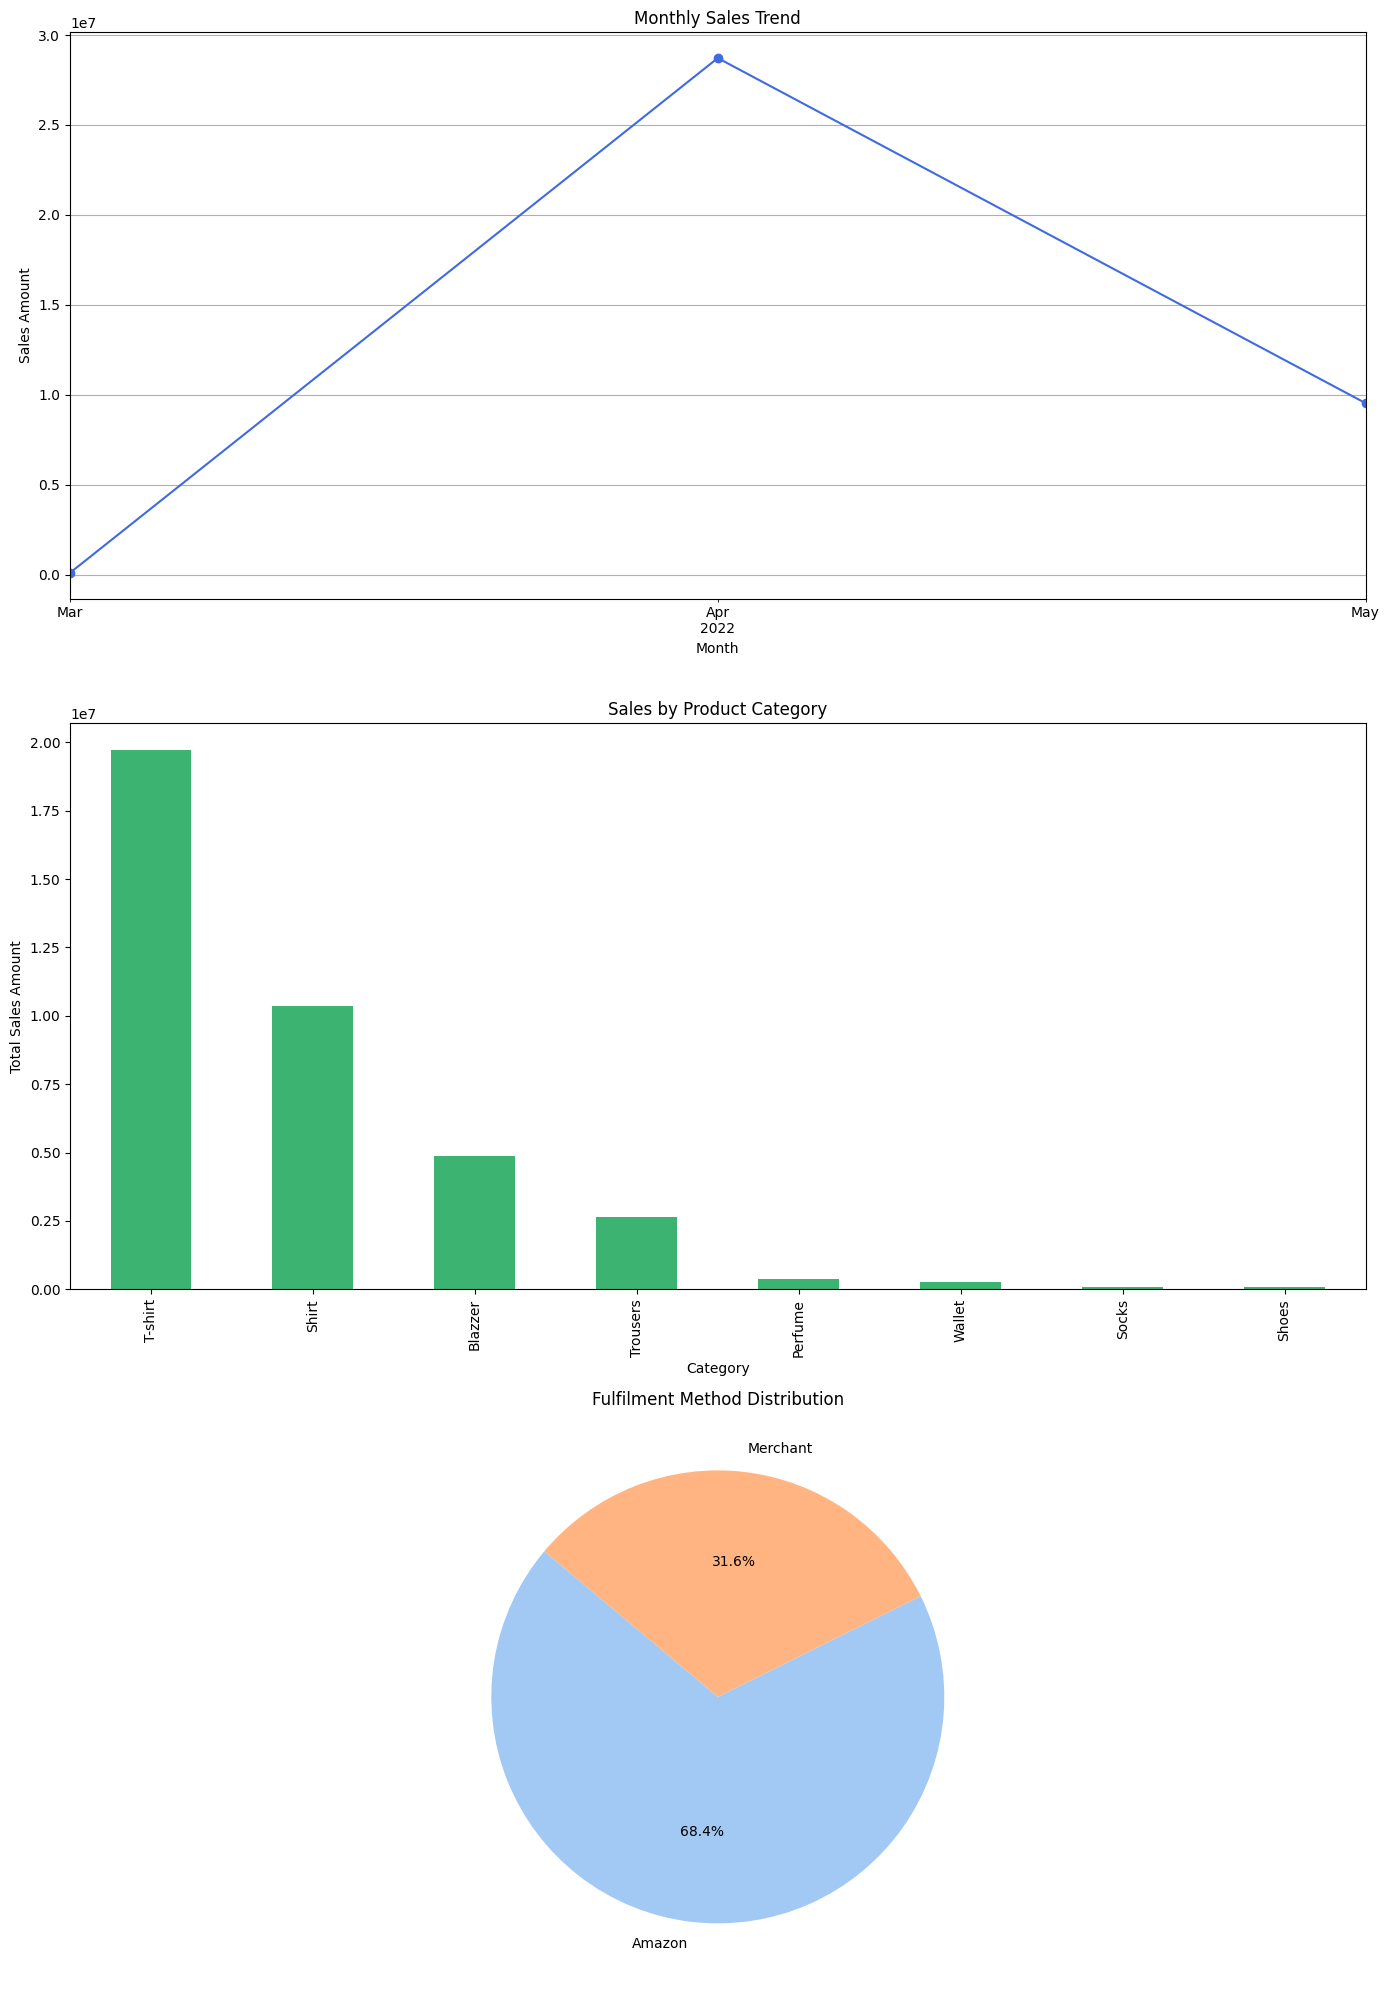

In [1]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
file_path = "Amazon Sale Report.csv"  # Update path if needed
df = pd.read_csv('Amazon Sale Report.csv', encoding='ISO-8859-1')

# 3. Clean and preprocess the data
df.drop(columns=['index', 'New', 'PendingS'], inplace=True, errors='ignore')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date', 'Amount', 'ship-city', 'ship-state', 'Category'], inplace=True)
df.rename(columns={
    'ship-city': 'City',
    'ship-state': 'State',
    'ship-country': 'Country',
    'Qty': 'Quantity'
}, inplace=True)

# 4. Create a Month column for trend analysis
df['Month'] = df['Date'].dt.to_period('M')

# 5. Generate data summaries for plotting
monthly_sales = df.groupby('Month')['Amount'].sum()
product_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
fulfillment_counts = df['Fulfilment'].value_counts()

# 6. Plotting visualizations
fig, axs = plt.subplots(3, 1, figsize=(14, 20))

# Monthly Sales Trend
monthly_sales.plot(kind='line', ax=axs[0], marker='o', color='royalblue')
axs[0].set_title('Monthly Sales Trend')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales Amount')
axs[0].grid(True)

# Product Category Sales
product_sales.plot(kind='bar', ax=axs[1], color='mediumseagreen')
axs[1].set_title('Sales by Product Category')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Total Sales Amount')

# Fulfilment Method Distribution
axs[2].pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axs[2].set_title('Fulfilment Method Distribution')

plt.tight_layout()
plt.show()


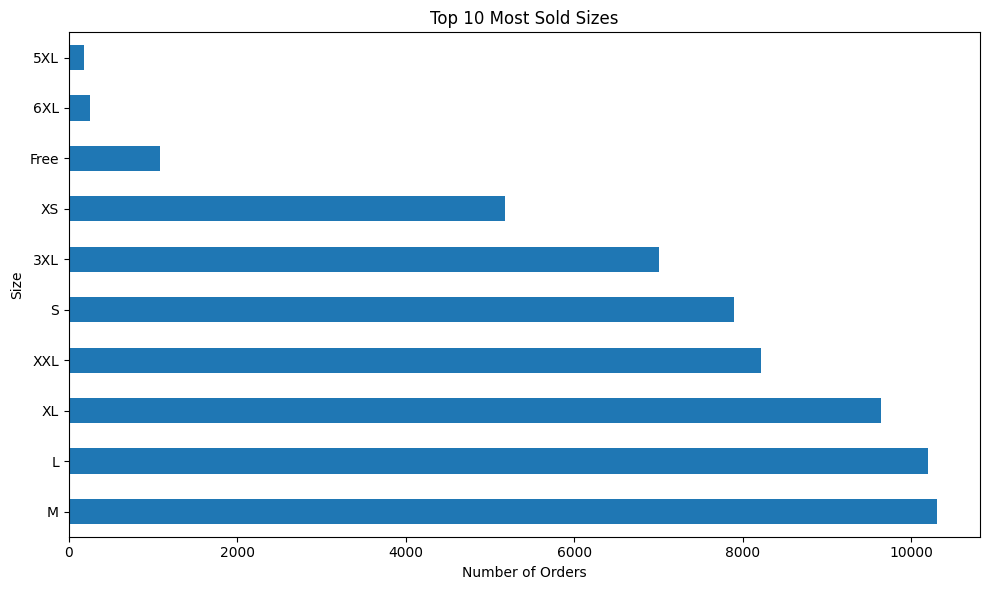

In [2]:
#Most Sold sizes
size_counts = df['Size'].value_counts().head(10)
size_counts.plot(kind='barh', title='Top 10 Most Sold Sizes', figsize=(10, 6))
plt.xlabel('Number of Orders')
plt.ylabel('Size')
plt.tight_layout()
plt.show()


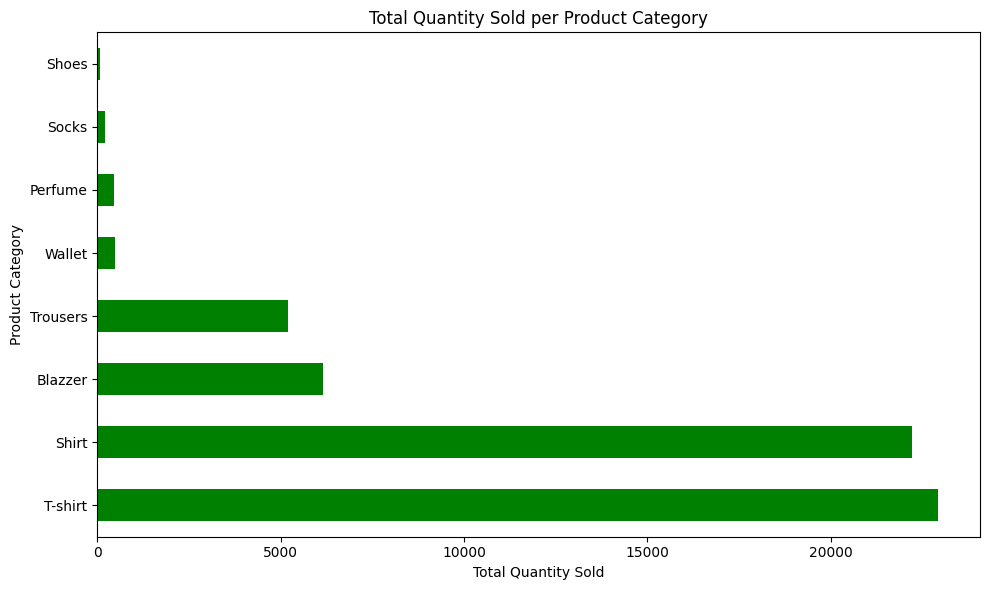

In [3]:
#Total Quantity Sold per category
quantity_by_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
quantity_by_category.plot(kind='barh', title='Total Quantity Sold per Product Category', figsize=(10, 6), color='green')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


<ipython-input-4-130641181>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette='mako')


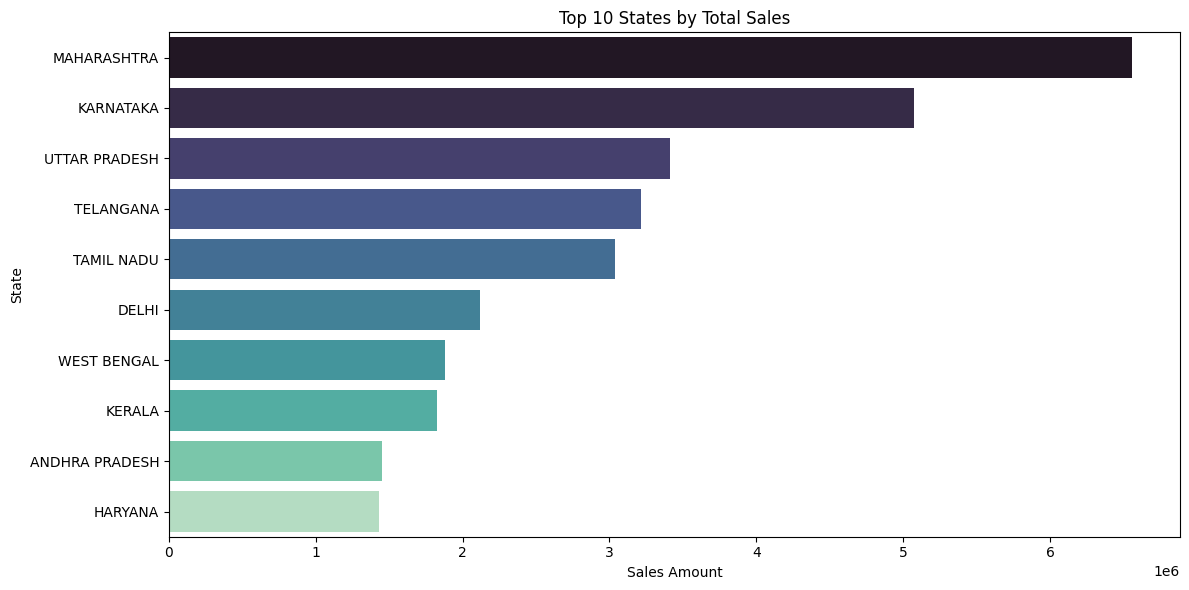

In [4]:
#Top 10 states by total sales
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette='mako')
plt.title('Top 10 States by Total Sales')
plt.xlabel('Sales Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()


<ipython-input-5-1170947627>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.values, y=sales_by_city.index, palette='rocket')


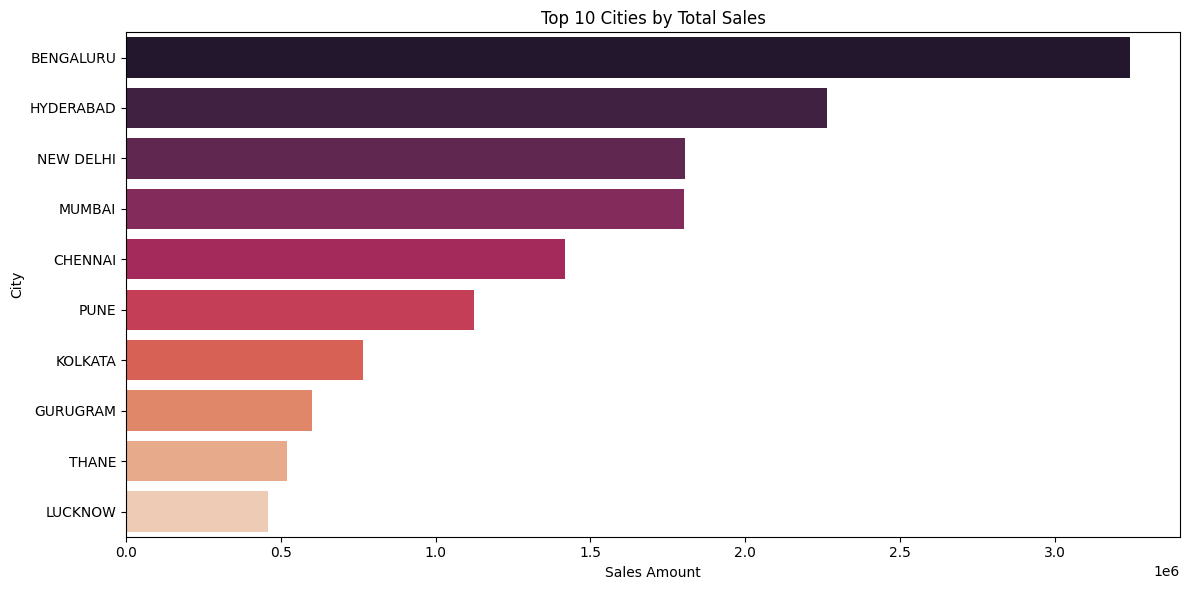

In [5]:
#Top 10 cities by total sales
sales_by_city = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_city.values, y=sales_by_city.index, palette='rocket')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Sales Amount')
plt.ylabel('City')
plt.tight_layout()
plt.show()
